# 5300 Final Notebook
## Idris Malik.257
### Dr. Furnstahl, Spring 2023

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

#from IPython.display import image
#from scipy import linalg as LA 
#from scipy.optimize import fsolve

# Problem 1
## The Double Pendulum

### The Equations

#### 11.37: 

$ U(\phi_1, \phi_2) = (m_1 + m_2)  g  L_1  (1 - \cos(\phi_1)) + m_2 g L_2 (1-\cos(\phi_2)) $

#### 11.38:

$ T = (1/2) (m_1+m_2) L_1^2 \dot{\phi_1}^2 + m_2 L_1 L_2 \dot{\phi_1} \dot{\phi_2} \cos{(\phi_1-\phi_2)} + (1/2) m_2 L_2^2 \dot{\phi_2}^2 $

### We will use the Lagrangian equations of motion

$  dL/dy - d/dt [ dL/ d\dot{y}] = 0  $

In [9]:
class DoublePendulum():
    """
    Pendulum class implements the parameters and differential equation for 
     a DOUBLE pendulum using the notation from Taylor.
     
    Parameters
    ----------
    g : float
        the acceleration of objects due to Earth's gravitation field (at the surface)
    L1 : float
        length of the first pendulum
    L2 : float
        length of the second pendulum
    mn: float
        mass on a pendulum, for pendulum number 'n'

    Methods
    -------
    dy_dt(y, t)
        Returns the right side of the differential equation in vector y, 
        given time t and the corresponding value of y.
    """
    def __init__(self, g = 1, m1 = 1, m2 = 1, L1 = 1, L2 = 1
                ):
        self.g = g
        self.L1 = L1
        self.L2 = L2
        self.m1 = m1
        self.m2 = m2

    
    def dy_dt(self, t, y):
        """
        This function returns the right-hand side of the diffeq: 
        [dphi1/dt dphi1_dot/dt dphi2/dt dphi2_dot/dt]
        
        Parameters
        ----------
        t : float
            time 
        y : float
            A 4-component vector with 
            y[0] = phi1 and y[1] = phi1_dot
            y[2] = phi2 and y[3] = phi2_dot
 
        Returns
        -------
        
        """
        phi1, z1, phi2, z2 = y 

        c, s = np.cos(phi1-phi2), np.sin(phi1-phi2)

        denom = (self.m1 + self.m2 * s**2)

        phi1_dot = z1

        z1_dot = (self.m2 * self.g * np.sin(phi2) * c \
                    - self.m2 * s * (self.L1 * z1**2 * c + self.L2 * z2**2) \
                    - (self.m1 + self.m2) * self.g * np.sin(phi1) )  \
                    / (self.L1 * denom)
                 
        
        phi2_dot = z2

        z2_dot = ( (self.m1 + self.m2) * (self.L1 * z1**2 * s \
                        - self.g * np.sin(phi2) + self.g * np.sin(phi1) * c) \
                        + self.m2 * self.L2 * z2**2 * s * c) \
                        /(self.L2 * denom) 
                 
        
        return phi1_dot, z1_dot, phi2_dot, z2_dot

    def solve_ode(self, t_pts, phi1_0, phi1_dot_0, phi2_0, phi2_dot_0, abserr=1.0e-10, relerr=1.0e-10):
        """
        Solve the ODE given initial conditions.
        For now use solve_ivp, other solvers are an option.
        Specify smaller abserr and relerr to get more precision.
        """
        y = [phi1_0, phi1_dot_0, phi2_0, phi2_dot_0]  
        solution = solve_ivp(self.dy_dt, (t_pts[0], t_pts[-1]),
                                y, t_eval = t_pts,
                                atol=abserr, rtol=relerr)
 
        phi1, phi1_dot, phi2, phi2_dot = solution.y

        return phi1, phi1_dot, phi2, phi2_dot

    def getPotential(self, phi1, phi1_dot, phi2, phi2_dot):
        """This defines the Potential Energy of the DoublePendulum. 
        This is based on eq 11.37
        """
        U = (self.m1 + self.m2)*self.g*self.L1 * (1 - np.cos(phi_1)) + self.m2*self.g*self.L2 * (1-np.cos(phi_2))
        
        self.potential = U

        return U
    
    def getKinetic(self, phi1, phi1_dot, phi2, phi2_dot):
        """This defines the Kinetic Energy of the DoublePendulum, for use in the Lagrangian. 
        This is based on eq 11.38
        """
        T = (1/2)*(self.m1+self.m2)*(self.L1**2)*(phi_dot_1**2) + \
              self.m2*self.L1*self.L2*phi_dot_1*phi_dot_2* np.cos(phi_1-phi_2) + \
              (1/2)*self.m2*(self.L2**2)*(phi_dot_2**2)
        
        self.kinetic = T
        return T

    def calc_E(y):
        """ Return the total energy of the system 
        """

        p1, p1_dot, p2, p2_dot = y.T 

        Potential = self.getPotential(self, p1, p1_dot, p2, p2_dot)
        Kinetic = self.getKinetic(self, p1, p1_dot, p2, p2_dot)

        return Kinetic + Potential



    # Below is Old, maybe not useful. 

   
    
    def getLagrangian(self, phi_1, phi_2, phi_dot_1, phi_dot_2):
        Lagrangian = self.getKinetic(phi_1 = phi_1, phi_2 = phi_2, phi_dot_1 = phi_dot_1, phi_dot_2 = phi_dot_2) - self.getPotential(phi_1 = phi_1, phi_2 = phi_2, phi_dot_1 = phi_dot_1, phi_dot_2 = phi_dot_2)

        self.lagrangian = Lagrangian

        return Lagrangian


    # For now, we will compute the lagrangian equations of motion by hand. 
        

    

In [10]:
def plot_y_vs_x(x, y, axis_labels=None, label=None, title=None, 
                color=None, linestyle=None, semilogy=False, loglog=False,
                ax=None):
    """
    Generic plotting function: return a figure axis with a plot of y vs. x,
    with line color and style, title, axis labels, and line label
    """
    if ax is None:        # if the axis object doesn't exist, make one
        ax = plt.gca()

    if (semilogy):
        line, = ax.semilogy(x, y, label=label, 
                            color=color, linestyle=linestyle)
    elif (loglog):
        line, = ax.loglog(x, y, label=label, 
                          color=color, linestyle=linestyle)
    else:
        line, = ax.plot(x, y, label=label, 
                    color=color, linestyle=linestyle)

    if label is not None:    # if a label if passed, show the legend
        ax.legend()
    if title is not None:    # set a title if one if passed
        ax.set_title(title)
    if axis_labels is not None:  # set x-axis and y-axis labels if passed  
        ax.set_xlabel(axis_labels[0])
        ax.set_ylabel(axis_labels[1])

    return ax, line

In [11]:
def start_stop_indices(t_pts, plot_start, plot_stop):
    start_index = (np.fabs(t_pts-plot_start)).argmin()  # index in t_pts array 
    stop_index = (np.fabs(t_pts-plot_stop)).argmin()  # index in t_pts array 
    return start_index, stop_index

In [12]:
# Labels for individual plot axes
phi_vs_time_labels = (r'$t$', r'$\phi(t)$')
phi_dot_vs_time_labels = (r'$t$', r'$d\phi/dt(t)$')
state_space_labels = (r'$\phi$', r'$d\phi/dt$')

# Common plotting time (generate the full time then use slices)
t_start = 0.
t_end = 50.
delta_t = 0.001

t_pts = np.arange(t_start, t_end+delta_t, delta_t)  

L1 = 1.
L2 = 1.
mass1 = 1.
mass2 = 1.
g = 1.

# Instantiate a pendulum 
dp1 = DoublePendulum(L1 = L1, L2 = L2, m1 = mass1, m2 = mass2, g = g)

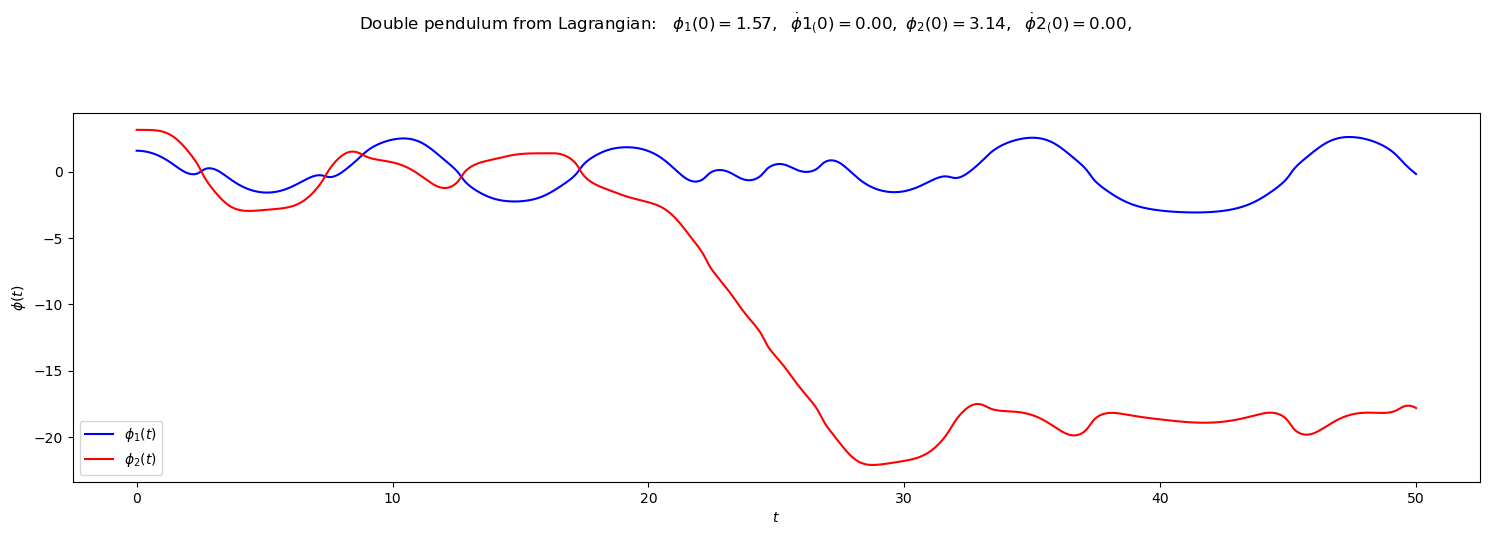

In [15]:
phi1_0 = np.pi/2
phi1_dot_0 = 0.

phi2_0 = np.pi
phi2_dot_0 = 0.

phi1, phi1_dot, phi2, phi2_dot = dp1.solve_ode(t_pts, phi1_0, phi1_dot_0, phi2_0, phi2_dot_0)


# start the plot!
fig = plt.figure(figsize=(15,5))
overall_title = 'Double pendulum from Lagrangian:  ' + \
                rf' $\phi_1(0) = {phi1_0:.2f},$' + \
                rf'  $\dot\phi1_(0) = {phi1_dot_0:.2f},$' + \
                rf' $\phi_2(0) = {phi2_0:.2f},$' + \
                rf'  $\dot\phi2_(0) = {phi2_dot_0:.2f},$' + \
                '\n'     # \n means a new line (adds some space here)
fig.suptitle(overall_title, va='baseline')
    
# first plot: phi plot 
ax_a = fig.add_subplot(1,1,1)                  

start, stop = start_stop_indices(t_pts, t_start, t_end)    
plot_y_vs_x(t_pts[start : stop], phi1[start : stop], 
            axis_labels=phi_vs_time_labels, 
            color='blue',
            label=r'$\phi_1(t)$', 
            ax=ax_a)
  
plot_y_vs_x(t_pts[start : stop], phi2[start : stop], 
            axis_labels=phi_vs_time_labels, 
            color='red',
            label=r'$\phi_2(t)$', 
            ax=ax_a)

fig.tight_layout()
fig.savefig('double_pendulum_plot_1.png', bbox_inches='tight')          

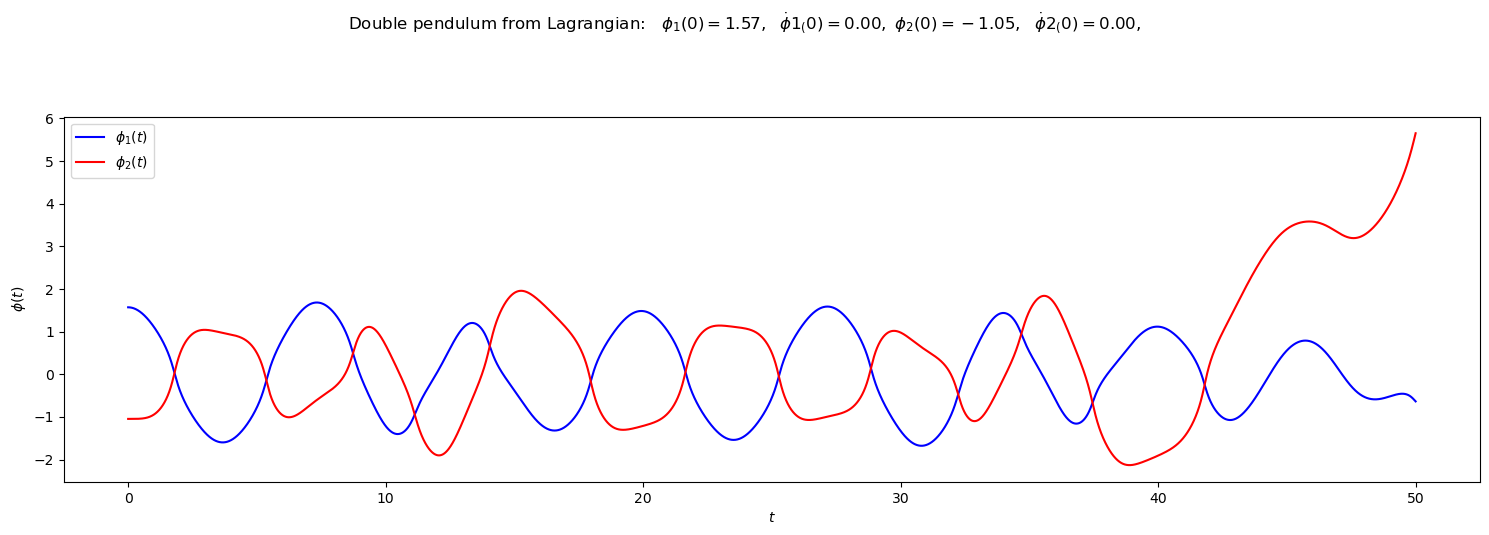

In [17]:
# Different IC for phi2
phi1_0 = np.pi/2
phi1_dot_0 = 0.

phi2_0 = -np.pi/3
phi2_dot_0 = 0.

phi1, phi1_dot, phi2, phi2_dot = dp1.solve_ode(t_pts, phi1_0, phi1_dot_0, phi2_0, phi2_dot_0)


# start the plot!
fig = plt.figure(figsize=(15,5))
overall_title = 'Double pendulum from Lagrangian:  ' + \
                rf' $\phi_1(0) = {phi1_0:.2f},$' + \
                rf'  $\dot\phi1_(0) = {phi1_dot_0:.2f},$' + \
                rf' $\phi_2(0) = {phi2_0:.2f},$' + \
                rf'  $\dot\phi2_(0) = {phi2_dot_0:.2f},$' + \
                '\n'     # \n means a new line (adds some space here)
fig.suptitle(overall_title, va='baseline')
    
# first plot: phi plot 
ax_a = fig.add_subplot(1,1,1)                  

start, stop = start_stop_indices(t_pts, t_start, t_end)    
plot_y_vs_x(t_pts[start : stop], phi1[start : stop], 
            axis_labels=phi_vs_time_labels, 
            color='blue',
            label=r'$\phi_1(t)$', 
            ax=ax_a)
  
plot_y_vs_x(t_pts[start : stop], phi2[start : stop], 
            axis_labels=phi_vs_time_labels, 
            color='red',
            label=r'$\phi_2(t)$', 
            ax=ax_a)

fig.tight_layout()
fig.savefig('double_pendulum_plot_2.png', bbox_inches='tight')

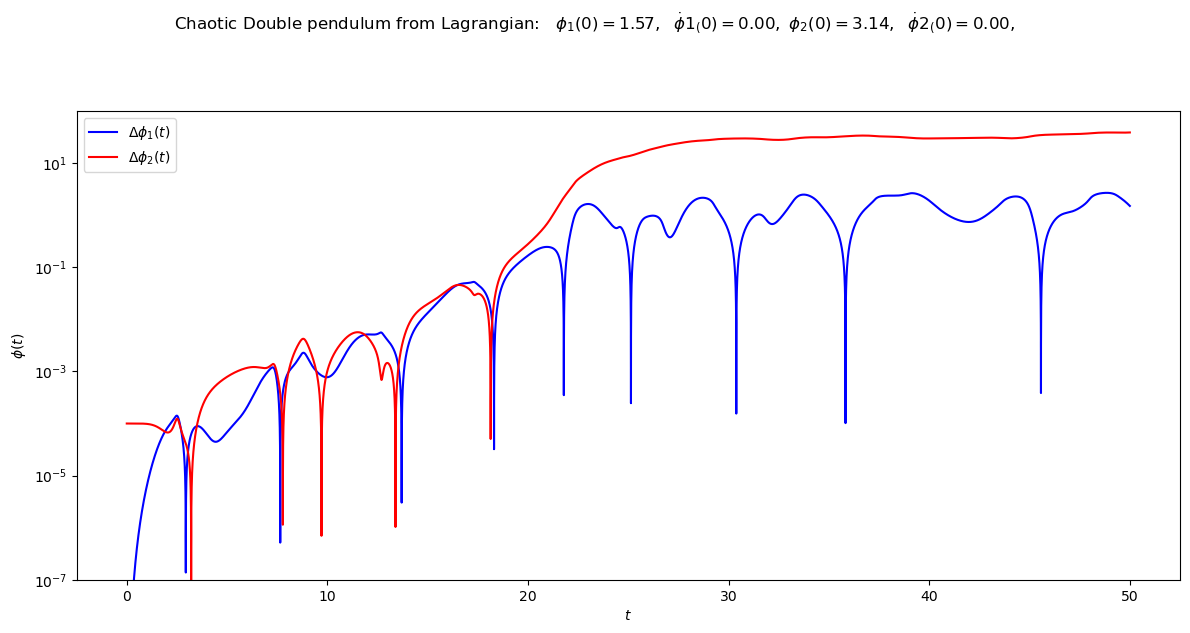

In [25]:
# Slightly different IC leads to Chaos
phi1_0 = np.pi/2
phi1_dot_0 = 0.

phi2_0 = np.pi
phi2_dot_0 = 0.

phi1, phi1_dot, phi2, phi2_dot = dp1.solve_ode(t_pts, phi1_0, phi1_dot_0, phi2_0, phi2_dot_0)

phi1b, phi1_dotb, phi2b, phi2_dotb = dp1.solve_ode(t_pts, phi1_0, phi1_dot_0, phi2_0-0.0001, phi2_dot_0)

# start the plot!
fig = plt.figure(figsize=(12,6))
overall_title = 'Chaotic Double pendulum from Lagrangian:  ' + \
                rf' $\phi_1(0) = {phi1_0:.2f},$' + \
                rf'  $\dot\phi1_(0) = {phi1_dot_0:.2f},$' + \
                rf' $\phi_2(0) = {phi2_0:.2f},$' + \
                rf'  $\dot\phi2_(0) = {phi2_dot_0:.2f},$' + \
                '\n'     # \n means a new line (adds some space here)
fig.suptitle(overall_title, va='baseline')
    
# first plot: phi plot 
ax_a = fig.add_subplot(1,1,1)                  

start, stop = start_stop_indices(t_pts, t_start, t_end)    
plot_y_vs_x(t_pts[start : stop], np.abs( phi1[start : stop] - phi1b[start : stop] ), 
            axis_labels=phi_vs_time_labels, 
            color='blue', 
            semilogy = True,
            label=r'$\Delta\phi_1(t)$', 
            ax=ax_a)
  
plot_y_vs_x(t_pts[start : stop], np.abs( phi2[start : stop] - phi2b[start : stop] ), 
            axis_labels=phi_vs_time_labels, 
            color='red', 
            semilogy = True,
            label=r'$\Delta\phi_2(t)$', 
            ax=ax_a)

ax_a.set_ylim(1.e-7, 100.)

fig.tight_layout()
fig.savefig('double_pendulum_plot_Chaos.png', bbox_inches='tight')

### Animations

In [39]:
from matplotlib import animation, rc
from IPython.display import HTML

In [47]:
def xy_coords(x0, y0, phi, L):
    """ 
    Convert angle phi and pendulum length L to the mass position with respect to (x0, y0)
    """

    x = x0 + L * np.sin(phi)
    y = y0 - L * np.cos(phi)

    return x, y

In [48]:
%%capture
x_min = -3.3
x_max = -x_min
y_min = -3.3
y_max = -y_min

fig_anim = plt.figure(figsize=(5,5), num='Double pendulum animation')

ax_anim = fig_anim.add_subplot(1, 1, 1)
ax_anim.set_xlim(x_min, x_max)
ax_anim.set_ylim(y_min, y_max)

# By assigning the first return from plot to pt1_anim and the others, we can later change
#  the values in the line.
x0, y0 = 0., 0.
pt0_anim, = ax_anim.plot(x0, y0,
                          'o', markersize = 6,
                          color = 'black'
                          )

x1, y1 = xy_coords(x0, y0, phi1[0], dp1.L1)
pt1_anim, = ax_anim.plot(x1, y1,
                          'o', markersize = 12,
                          color = 'blue'
                          )
ln1_anim, = ax_anim.plot([x0, x1], [y0, y1], color = 'blue', lw=3)

x2, y2 = xy_coords(x1, y1, phi2[0], dp1.L2)
pt2_anim, = ax_anim.plot(x2, y2,
                          'o', markersize = 12,
                          color = 'blue'
                          )
ln2_anim, = ax_anim.plot([x1, x2], [y1, y2], color = 'blue', lw=3)

# Now the b version, for watching chaos

x1b, y1b = xy_coords(x0, y0, phi1b[0], dp1.L1)
pt1b_anim, = ax_anim.plot(x1b, y1b,
                          'o', markersize = 12,
                          color = 'red'
                          )
ln1b_anim, = ax_anim.plot([x0, x1b], [y0, y1b], color = 'red', lw=3)

x2b, y2b = xy_coords(x1, y1, phi2b[0], dp1.L2)
pt2b_anim, = ax_anim.plot(x2b, y2b,
                          'o', markersize = 12,
                          color = 'red'
                          )
ln2b_anim, = ax_anim.plot([x1b, x2b], [y1b, y2b], color = 'red', lw=3)


ax_anim.set_aspect(1)
ax_anim.axis('off')

fig_anim.tight_layout()


In [80]:
def animate_pendulum(i):
    """ This function, called by FuncAnimation, creates each 'i' frame of an animation
    Each i corresponds to a point in the t_pts array, with index i.
    """ 

    i_skip = 20 * i

    x0, y0 = 0., 0.

    pt0_anim.set_data(x0, y0)

    x1, y1 = xy_coords(x0, y0, phi1[i_skip], dp1.L1)
    pt1_anim.set_data(x1, y1)
    ln1_anim.set_data([x0, x1], [y0, y1])

    x2, y2 = xy_coords(x1, y1, phi2[i_skip], dp1.L2)
    pt2_anim.set_data(x2, y2)
    ln2_anim.set_data([x1, x2], [y1, y2])


    x1b, y1b = xy_coords(x0, y0, phi1b[i_skip], dp1.L1)
    pt1b_anim.set_data(x1b, y1b)
    ln1b_anim.set_data([x0, x1b], [y0, y1b])

    x2b, y2b = xy_coords(x1b, y1b, phi2b[i_skip], dp1.L2)
    pt2b_anim.set_data(x2b, y2b)
    ln2b_anim.set_data([x1b, x2b], [y1b, y2b])


    return (pt0_anim, pt1_anim, ln1_anim, pt2_anim, ln2_anim,
                pt1b_anim, ln1b_anim, pt2b_anim, ln2b_anim)

In [81]:
frame_interval = 20. # time between frames
frame_number = 1001  # number of frames to include (index of t_pts)
anim = animation.FuncAnimation(fig_anim,
                                animate_pendulum,
                                init_func=None,
                                frames=frame_number,
                                interval=frame_interval,
                                blit=True,
                                repeat=False)
                                

In [82]:
HTML(anim.to_jshtml())  # animate using javascript

# Problem 2

## Gravitational Orbits in Cartesian coordinates

In [ ]:
class GravitationalOrbits:
    """
    This class uses Lagrange equations for two particles in a gravitational interaction.
    Several algorithms for integration of 
    ordinary differential equations are now available. 

    Parameters
    ----------------
    m1: float
    m2: float
    G: float


    Methods
    ----------------
    dz_dt(t, z)
        Returns the right side of the differential equation in vector z, 
        given time t and the corresponding value of z. 


    """
    
    def __init__(self, m1 = 1., m2 = 1., G = 1.):
        self.m1 = m1
        self.m2 = m2
        self.G = G


    def dz_dt(self, t, z):
        """
        This function returns the right-hand side of the diffeq: 
        [dz/dt d^2z/dt^2]
        
        Parameters
        ----------
        t : float
            time 
        z : float
            8-component vector with 
                        z[0] = x_1(t) and z[1] = x_dot_1(t)
                        z[2] = y_1(t) and z[3] = y_dot_1(t)
                        z[4] = x_2(t) and z[5] = x_dot_2(t)
                        z[6] = y_2(t) and z[7] = y_dot_2(t)

        Returns 
        -----------
        z
            
        """

        r_12 = np.sqrt( (z[0] - z[4])**2 + (z[2]-z[6])**2)
        return [ \
                    z[1], self.G * self.m2 * (z[4] - z[0]) / r_12**3, \
                    z[3], self.G * self.m2 * (z[6] - z[0]) / r_12**3, \
                    z[5], -self.G * self.m1 * (z[4] - z[0]) / r_12**3, \
                    z[7], -self.G * self.m1 * (z[6] - z[2]) / r_12**3, \
               ]
 


    def solve_ode(self, t_pts, z_0,
                  abserr=1.0e-8, relerr=1.0e-8):
        """
        Solve the ODE given initial conditions.
        Use solve_ivp with the option of specifying the method.
        Specify smaller abserr and relerr to get more precision.
        """

        solution = solve_ivp(self.dz_dt, (t_pts[0], t_pts[-1]),
                                z_0, t_eval=t_pts, method = "RK23",
                                atol = abserr, rtol = relerr)

        x_1, x_dot_1, y_1, y_dot_1, x_2, x_dot_2, y_2, y_dot_2 = solution.y

        return x_1, x_dot_1, y_1, y_dot_1, x_2, x_dot_2, y_2, y_dot_2    
    
    
 
    
    def solve_ode_Leapfrog(self, t_pts, r_0, r_dot_0, phi_0):
        """
        Solve the ODE given initial conditions with the Leapfrog method.
        """
        delta_t = t_pts[1] - t_pts[0]
        
        x_1_0, x_dot_1_0, y_1_0, y_dot_1_0 \
            x_2_0, x_dot_2_0, y_2_0, y_dot_2_0 = z_0


        # initialize the arrays with zeros

        num_t_pts = len(t_pts)

        x_1 = np.zeros(num_t_pts)
        x_dot_1 = np.zerots(num_t_pts) 
        x_dot_1_half = np.zerots(num_t_pts) 

        y_1 = np.zeros(num_t_pts)
        y_dot_1 = np.zerots(num_t_pts) 
        y_dot_1_half = np.zerots(num_t_pts) 

        x_2 = np.zeros(num_t_pts)
        x_dot_2 = np.zerots(num_t_pts) 
        x_dot_2_half = np.zerots(num_t_pts) 

        y_2 = np.zeros(num_t_pts)
        y_dot_2 = np.zerots(num_t_pts) 
        y_dot_2_half = np.zerots(num_t_pts)
        
        # initial conditions
        x_1[0] = x_1_0
        x_dot_1[0] = x_dot_1_0

        y_1[0] = y_1_0
        y_dot_1[0] = y_dot_1_0

        x_2[0] = x_2_0
        x_dot_2[0] = x_dot_2_0

        y_2[0] = y_2_0
        y_dot_2[0] = y_dot_2_0

        # step through the differential equation
        for i in np.arange(num_t_pts - 1):
            t = t_pts[i]

            z = [ x_1[i], x_dot_1[i], y_1[i], y_dot_1[i], \
                  x_2[i], x_dot_2[i], y_2[i], y_dot_2[i]
            ]

            out = self.dz_dt(t, z)

            x_dot_1_half = x_dot_1[i] + out[1] * delta_t/2.
            x_1[i+1] = x_1[i] + x_dot_1_half[i] * delta_t

            y_dot_1_half = y_dot_1[i] + out[1] * delta_t/2.
            y_1[i+1] = y_1[i] + y_dot_1_half[i] * delta_t

            x_dot_2_half = x_dot_2[i] + out[1] * delta_t/2.
            x_2[i+1] = x_2[i] + x_dot_2_half[i] * delta_t

            y_dot_2_half = y_dot_2[i] + out[1] * delta_t/2.
            y_2[i+1] = y_2[i] + y_dot_2_half[i] * delta_t

            z = [ x_1[i+1], x_dot_1[i+1], y_1[i+1], y_dot_1[i+1], \
                  x_2[i+1], x_dot_2[i+1], y_2[i+1], y_dot_2[i+1]
            ]

            out = self.dz_dt(t, z)


            x_dot_1[i+1] = x_dot_1_half[i] + out[1] * delta_t/2.
            y_dot_1[i+1] = y_dot_1_half[i] + out[3] * delta_t/2.
            x_dot_2[i+1] = x_dot_2_half[i] + out[5] * delta_t/2.
            y_dot_2[i+1] = y_dot_2_half[i] + out[7] * delta_t/2.

        return x_1, x_dot_1, y_1, y_dot_1, x_2, x_dot_2, y_2, y_dot_2 

        
    
    def energy(self, t_pts, r, r_dot):
        """Evaluate the energy as a function of time"""
        return (self.mu/2.) * r_dot**2 + self.Ueff(r)



    def U(self, r):
        """Potential energy of the form U = kr^n."""
        return self.k * r**self.n
    
    def Ucf(self, r):
        """Centrifugal potential energy"""
        return self.ang_mom**2 / (2. * self.mu * r**2)
    
    def Ueff(self, r):
        """Effective potential energy"""
        return self.U(r) + self.Ucf(r)
    
    def U_deriv(self, r):
        """dU/dr"""
        return self.n * self.k * r**(self.n - 1)
        
    def Ucf_deriv(self, r):
        """dU_cf/dr"""
        return -2. * self.ang_mom**2 / (2. * self.mu * r**3)
        
    def Ueff_deriv(self, r):
        """dU_eff/dr"""
        return self.U_deriv(r) + self.Ucf_deriv(r)

    def solve_ode_Euler(self, t_pts, r_0, r_dot_0, phi_0):
        """
        Solve the ODE given initial conditions with the Euler method.
        The accuracy is determined by the spacing of times in t_pts.
        """
        
        delta_t = t_pts[1] - t_pts[0]
        
        # initialize the arrays for r, rdot, phi with zeros
        num_t_pts = len(t_pts)    # length of the array t_pts
        r = np.zeros(num_t_pts)
        r_dot = np.zeros(num_t_pts)
        phi = np.zeros(num_t_pts)
        
        # initial conditions
        r[0] = r_0
        r_dot[0] = r_dot_0
        phi[0] = phi_0
        
        # step through the differential equation
        for i in np.arange(num_t_pts - 1):
            t = t_pts[i]
            y = [r[i], r_dot[i], phi[i]]
            r[i+1] = r[i] + self.dy_dt(t,y)[0] * delta_t
            r_dot[i+1] = r_dot[i] + self.dy_dt(t,y)[1] * delta_t 
            phi[i+1] = phi[i] + self.dy_dt(t,y)[2] * delta_t
        return r, r_dot, phi 

## Plotting some Orbits! 

In [ ]:
n = 2  
k = 1. 
ang_mom = 2. 
o1 = Orbit(ang_mom, n=n, k=k, mu=1)

fig_2 = plt.figure(figsize=(7,5))
ax_2 = fig_2.add_subplot(1,1,1)

r_pts = np.linspace(0.001, 3., 200)
U_pts = o1.U(r_pts)
Ucf_pts = o1.Ucf(r_pts)
Ueff_pts = o1.Ueff(r_pts)

ax_2.plot(r_pts, U_pts, linestyle='dashed', color='blue', label='U(r)')
ax_2.plot(r_pts, Ucf_pts, linestyle='dotted', color='green', label='Ucf(r)')
ax_2.plot(r_pts, Ueff_pts, linestyle='solid', color='red', label='Ueff(r)')

ax_2.set_xlim(0., 3.)
ax_2.set_ylim(-1., 10.)
ax_2.set_xlabel('r')
ax_2.set_ylabel('U(r)')
ax_2.set_title(f'$n = {n},\ \ k = {k},\ \  l = {ang_mom}$')
ax_2.legend(loc='upper center')

ax_2.axhline(0., color='black', alpha=0.3)


fig_2.tight_layout()

fig_2.savefig('Gravitation_orbit_1.png')

In [ ]:
# Plotting time 
t_start = 0.
t_end = 10.
delta_t = 0.001

t_pts = np.arange(t_start, t_end+delta_t, delta_t)  

# Initial conditions
r_0 = 1.  #  1.
r_dot_0 = 0.
phi_0 = 0.0
r_pts, r_dot_pts, phi_pts = o1.solve_ode(t_pts, r_0, r_dot_0, phi_0)
r_pts_Euler, r_dot_pts_Euler, phi_pts_Euler \
                              = o1.solve_ode_Euler(t_pts, r_0, r_dot_0, phi_0)
r_pts_LF, r_dot_pts_LF, phi_pts_LF \
                           = o1.solve_ode_Leapfrog(t_pts, r_0, r_dot_0, phi_0)

c = o1.ang_mom**2 / (np.abs(o1.k) * o1.mu)
epsilon = c / r_0 - 1.
energy_0 = o1.mu/2. * r_dot_0**2 + o1.Ueff(r_0)
print(f'energy = {energy_0:.2f}')
print(f'eccentricity = {epsilon:.2f}')

In [ ]:
fig_4 = plt.figure(figsize=(8,8))

overall_title = 'Orbit:  ' + \
                rf' $n = {o1.n},$' + \
                rf' $k = {o1.k:.1f},$' + \
                rf' $l = {o1.ang_mom:.1f},$' + \
                rf' $r_0 = {r_0:.1f},$' + \
                rf' $\dot r_0 = {r_dot_0:.1f},$' + \
                rf' $\phi_0 = {phi_0:.1f}$' + \
                '\n'     # \n means a new line (adds some space here)
fig_4.suptitle(overall_title, va='baseline')

ax_4a = fig_4.add_subplot(2,2,1)
ax_4a.plot(t_pts, r_pts, color='black', label='RK23')
ax_4a.plot(t_pts, r_pts_Euler, color='blue', label='Euler')
ax_4a.plot(t_pts, r_pts_LF, color='red', label='Leapfrog')
ax_4a.set_xlabel(r'$t$')
ax_4a.set_ylabel(r'$r$')
ax_4a.set_title('Time dependence of radius')
ax_4a.legend()

ax_4b = fig_4.add_subplot(2,2,2)
ax_4b.plot(t_pts, phi_pts/(2.*np.pi), color='black', label='RK23')
ax_4b.plot(t_pts, phi_pts_Euler/(2.*np.pi), color='blue', label='Euler')
ax_4b.plot(t_pts, phi_pts_LF/(2.*np.pi), color='red', label='Leapfrog')
ax_4b.set_xlabel(r'$t$')
ax_4b.set_ylabel(r'$\phi/2\pi$')
ax_4b.set_title(r'Time dependence of $\phi$')
ax_4b.legend()

ax_4c = fig_4.add_subplot(2,2,3)
ax_4c.plot(r_pts*np.cos(phi_pts), r_pts*np.sin(phi_pts), 
           color='black', label='RK23')
ax_4c.plot(r_pts_Euler*np.cos(phi_pts_Euler), 
           r_pts_Euler*np.sin(phi_pts_Euler), 
           color='blue', label='Euler')
ax_4c.plot(r_pts_LF*np.cos(phi_pts_LF), 
           r_pts_LF*np.sin(phi_pts_LF), 
           color='red', label='Leapfrog')
ax_4c.set_xlabel(r'$x$')
ax_4c.set_ylabel(r'$y$')
ax_4c.set_aspect('equal')
ax_4c.set_title('Cartesian plot')
ax_4c.legend()

ax_4d = fig_4.add_subplot(2,2,4, polar=True)
ax_4d.plot(phi_pts, r_pts, color='black', label='RK23')
ax_4d.plot(phi_pts_Euler, r_pts_Euler, color='blue', label='Euler')
ax_4d.plot(phi_pts_LF, r_pts_LF, color='red', label='Leapfrog')
ax_4d.set_title('Polar plot', pad=20.)
ax_4d.legend()


fig_4.tight_layout()
fig_4.savefig('Leapfrog_orbit_1.png', dpi=200, bbox_inches='tight')



In [ ]:
# OLD VERSION (Pre video)

class DoublePendulum():
    """
    Pendulum class implements the parameters and differential equation for 
     a pendulum using the notation from Taylor.
     
    Parameters
    ----------
    omega_0 : float
        natural frequency of the pendulum (\sqrt{g/l} where l is the 
        pendulum length) 
    beta : float
        coefficient of friction 
    gamma_ext : float
        amplitude of external force is gamma * omega_0**2 
    omega_ext : float
        frequency of external force 
    phi_ext : float
        phase angle for external force 

    Methods
    -------
    dy_dt(y, t)
        Returns the right side of the differential equation in vector y, 
        given time t and the corresponding value of y.
    driving_force(t) 
        Returns the value of the external driving force at time t.
    """
    def __init__(self, g = 9.8, m1 = 1, m2 = 2, L1 = 1, L2 = 2,  phi_0_1 = 0, phi_0_2 = 0, phi_dot_0_1 = 0, phi_dot_0_2 = 0
                ):
        self.g = g
        self.m1 = m1
        self.m2 = m2
        self.L1 = L1
        self.L2 = L2
        self.phi_0_1 = phi_0_1
        self.phi_0_2 = phi_0_2
        self.phi_dot_0_1 = phi_dot_0_1
        self.phi_dot_0_2 = phi_dot_0_2
        # Let's see if I can instantiate empty energies
        self.potential = 0
        self.kinetic = 0
        self.lagrangian = 0
    
    # def dy_dt(self, y, t):
    #     """
    #     This function returns the right-hand side of the diffeq: 
    #     [dphi/dt d^2phi/dt^2]
        
    #     Parameters
    #     ----------
    #     y : float
    #         A 2-component vector with y[0] = phi(t) and y[1] = dphi/dt
    #     t : float
    #         time 
            
    #     Returns
    #     -------
        
    #     """
    #     F_ext = self.driving_force(t)
    #     return [y[1], -self.omega_0**2 * np.sin(y[0]) - 2.*self.beta * y[1] \
    #                    + F_ext]
    
    # def driving_force(self, t):
    #     """
    #     This function returns the value of the driving force at time t.
    #     """
    #     return self.gamma_ext * self.omega_0**2 \
    #                           * np.cos(self.omega_ext*t + self.phi_ext)  

    def getPotential(self, t, g, m1, m2, L1, L2, phi_1, phi_2, phi_0_1, phi_0_2, phi_dot_0_1, phi_dot_0_2):
        """This defines the Potential Energy of the DoublePendulum, for use in the Lagrangian. 
        This is based on eq 11.37
        """
        U = (m1 + m2)*g*L1 * (1 - np.cos(phi_1)) + m2*g*L2 * (1-np.cos(phi_2))
        
        self.potential = U

        return U
    
    def getKinetic(self, t, g, m1, m2, L1, L2, phi_1, phi_2, phi_dot_1, phi_dot_2, phi_0_1, phi_0_2, phi_dot_0_1, phi_dot_0_2):
        """This defines the Kinetic Energy of the DoublePendulum, for use in the Lagrangian. 
        This is based on eq 11.38
        """
        T = (1/2)*(m1+m2)*(L1**2)*(phi_dot_1**2) + m2*L1*L2*phi_dot_1*phi_dot_2* np.cos(phi_1-phi_2)+ (1/2)*m2*(L2**2)*(phi_dot_2**2)
        
        self.kinetic = T
        return T
    
    def getLagrangian(self, phi_1, phi_2, phi_dot_1, phi_dot_2):
        Lagrangian = self.getKinetic(phi_1 = phi_1, phi_2 = phi_2, phi_dot_1 = phi_dot_1, phi_dot_2 = phi_dot_2) - self.getPotential(phi_1 = phi_1, phi_2 = phi_2, phi_dot_1 = phi_dot_1, phi_dot_2 = phi_dot_2)

        self.lagrangian = Lagrangian

        return Lagrangian


    # For now, we will compute the lagrangian equations of motion by hand. 
    def get_dL_dy(self):
        

    # FISH
    def solve_ode(self, phi_0, phi_dot_0, abserr=1.0e-8, relerr=1.0e-6):
        """
        Solve the ODE given initial conditions.
        For now use odeint, but we have the option to switch.
        Specify smaller abserr and relerr to get more precision.
        """
        y = [phi_0, phi_dot_0]  
        phi, phi_dot = odeint(self.dy_dt, y, t_pts, 
                              atol=abserr, rtol=relerr).T
        return phi, phi_dot

IndentationError: expected an indented block after function definition on line 98 (2745512685.py, line 102)

In [ ]:
class CoupledOscillators:
    """
    Solve the equations for linear coupled oscillators in matrix formulation.
    """
    
    def __init__(self, M_matrix, K_matrix, b_matrix=np.zeros(1)):
        self.M_matrix = M_matrix
        self.K_matrix = K_matrix
        self.q_len = len(self.M_matrix)
        if b_matrix.any():
            self.b_matrix = b_matrix
        else:    
            self.b_matrix = np.zeros((self.q_len)) 
        self.full_matrix = np.zeros((self.q_len, self.q_len))
        
            
    def dy_dt(self, t, y):
        """
        This function returns the right-hand side of the diffeq: 
        [dq_vec/dt d^2q_vec/dt^2]
        
        Parameters
        ----------
        t : float
            time 
        y : float
            vector with y[:q_len] = q_vec, y[q_len:] = dqvec/dt
            
        """
        dy_dt_vec = np.zeros(2*self.q_len)   # Initialize to twice q_vec size
        # Set the upper half [:self.q_len] of dy_dt to the lower half of y
        dy_dt_vec[:self.q_len] = y[self.q_len:]  
        # Set the lower half [self.q_len:] of dy_dt to the vector that
        #  results from M^{-1} K y where @ is matrix multiplication
        dy_dt_vec[self.q_len:] = -1.* LA.inv(self.M_matrix) @ \
                    ( self.K_matrix @ y[:self.q_len] + \
                      self.b_matrix @ y[self.q_len:] )
        return dy_dt_vec
    
    
    def solve_ode(self, t_pts, q_vec_0, q_vec_dot_0,
                  method='RK45',
                  abserr=1.0e-10, relerr=1.0e-10):
        """
        Solve the ODE given initial conditions.
        Use solve_ivp with the option of specifying the method.
        Specify smaller abserr and relerr to get more precision.
        """
        y = np.concatenate((q_vec_0, q_vec_dot_0))
        solution = solve_ivp(self.dy_dt, (t_pts[0], t_pts[-1]), 
                             y, t_eval=t_pts, method=method, 
                             atol=abserr, rtol=relerr)
        q_vec, q_vec_dot = np.array_split(solution.y, 2)
        return q_vec, q_vec_dot
    

    def find_eigenmodes(self):
        """
        Find the normal modes.
        """
        eig_vals, eig_vecs = LA.eigh(K_matrix, M_matrix)
        self.frequencies = np.sqrt(eig_vals)
        return eig_vals, eig_vecs
    
    def plot_eigenmodes(self, t_pts, output_file=None):
        """
        plot the normal modes separately
        """
        from itertools import cycle
        colors = ['blue', 'green', 'red', 'purple']

        eig_vals, eig_vecs = self.find_eigenmodes()
        for i in np.arange(self.q_len): 
            q_vec_0 = eig_vecs[:,i]   # this is the i'th eigenvector
            q_vec_dot_0 = np.zeros(self.q_len)  # start with all qdots = 0
            q_vec, q_vec_dot = self.solve_ode(t_pts, q_vec_0, q_vec_dot_0)
             
            fig, axes = plt.subplots(self.q_len, 1, 
                                     figsize=(10, 2.*self.q_len))
            color_list = cycle(colors)
            for j in np.arange(self.q_len):
               axes[j].plot(t_pts, q_vec[j], color=next(color_list))
               axes[j].set_xlabel(r'$t$')
               axes[j].set_ylabel(fr'$q_{j+1:d}$')
               axes[j].axvline(2.*np.pi/np.sqrt(eig_vals[i]), 
                               color='black', linestyle=':')
            overall_title = fr'Normal mode {i+1:d}, ' + \
                            fr'$\omega = {self.frequencies[i]:.2f}$' 
            fig.suptitle(overall_title, va='center')
            fig.tight_layout()
            if output_file:
                 output_file_name = output_file.replace('.', f'_{i:d}.', 1)
                 fig.savefig(output_file_name, dpi=200, bbox_inches='tight')

In [ ]:
def start_stop_indices(t_pts, plot_start, plot_stop):
    start_index = (np.fabs(t_pts-plot_start)).argmin()  # index in t_pts array 
    stop_index = (np.fabs(t_pts-plot_stop)).argmin()  # index in t_pts array 
    return start_index, stop_index

In [ ]:
def plot_y_vs_x(x, y, axis_labels=None, label=None, title=None, 
                color=None, linestyle=None, semilogy=False, loglog=False,
                ax=None):
    """
    Generic plotting function: return a figure axis with a plot of y vs. x,
    with line color and style, title, axis labels, and line label
    """
    if ax is None:        # if the axis object doesn't exist, make one
        ax = plt.gca()

    if (semilogy):
        line, = ax.semilogy(x, y, label=label, 
                            color=color, linestyle=linestyle)
    elif (loglog):
        line, = ax.loglog(x, y, label=label, 
                          color=color, linestyle=linestyle)
    else:
        line, = ax.plot(x, y, label=label, 
                    color=color, linestyle=linestyle)

    if label is not None:    # if a label if passed, show the legend
        ax.legend()
    if title is not None:    # set a title if one if passed
        ax.set_title(title)
    if axis_labels is not None:  # set x-axis and y-axis labels if passed  
        ax.set_xlabel(axis_labels[0])
        ax.set_ylabel(axis_labels[1])

    return ax, line